<a href="https://colab.research.google.com/github/sunkari-Mallikarjun/160122729057/blob/main/calories_burnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


In [2]:
calories_df = pd.read_csv('/content/calories.csv')
exercise_df = pd.read_csv('/content/exercise.csv')

In [3]:
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
c=calories_df['Calories']

In [6]:
exercise_df['Calories']=c

In [7]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: xlabel='count', ylabel='Gender'>

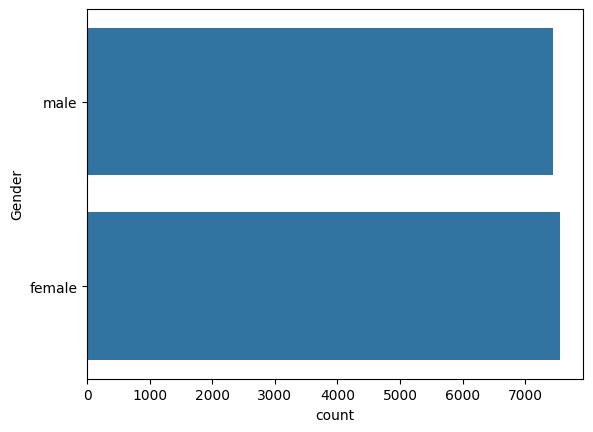

In [8]:
sns.countplot(exercise_df['Gender'])

In [9]:
exercise_df['Gender'].value_counts()

,count
Gender,
female,7553
male,7447


<ipython-input-10-7c89efe47b2a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

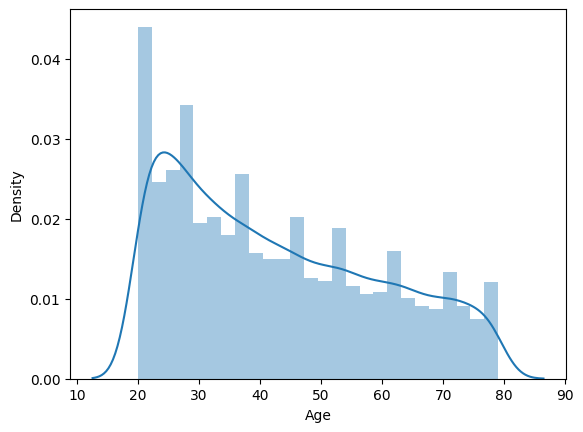

In [10]:
sns.distplot(exercise_df['Age'])

<ipython-input-11-04d142d0f963>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

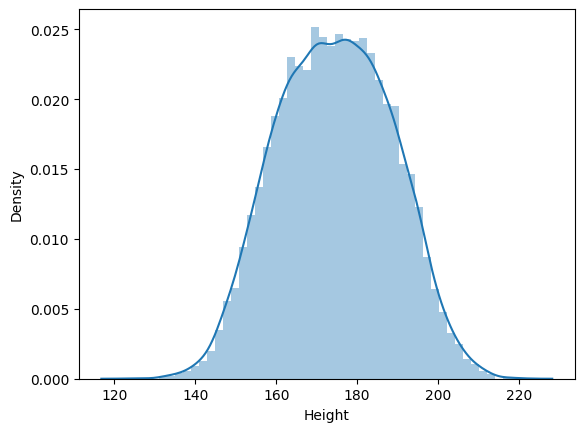

In [11]:
sns.distplot(exercise_df['Height'])

<ipython-input-12-39bc558b568a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

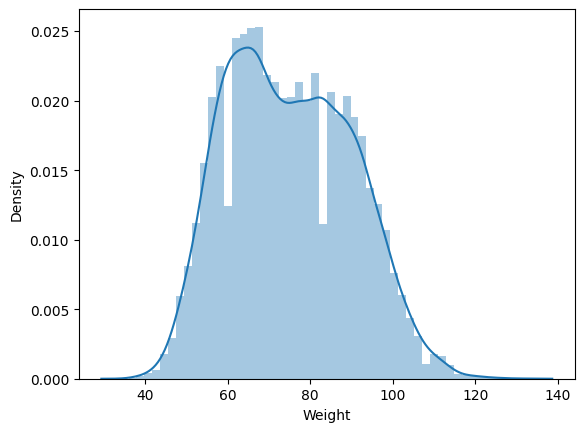

In [12]:
sns.distplot(exercise_df['Weight'])

In [13]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [14]:
exercise_df.replace({'Gender':{'male':1,'female':0}},inplace=True)

<ipython-input-14-5599fba88d37>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exercise_df.replace({'Gender':{'male':1,'female':0}},inplace=True)


In [15]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [16]:
X=exercise_df.drop(columns=['User_ID','Calories'],axis=1)
y=exercise_df['Calories']

In [17]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X.shape,X_train.shape,X_test.shape

((15000, 7), (12000, 7), (3000, 7))

In [19]:
regressor=XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
train_pred=regressor.predict(X_train)
test_pred=regressor.predict(X_test)

In [21]:
mse=mean_squared_error(y_train,train_pred)
print(mse)

1.63245658264028


In [22]:
mse=mean_squared_error(y_test,test_pred)
print(mse)

4.568956111227719


In [23]:
r2=r2_score(y_train,train_pred)
print(r2)

0.9995777219604748


In [24]:
r2=r2_score(y_test,test_pred)
print(r2)

0.9988678909361673


In [25]:
input_data=(1,68	,190.0	,94.0,	29.0,	105.0,	40.8)
input_data=np.asarray(input_data)
input_data=input_data.reshape(1,-1)

In [26]:
predicted_calories=regressor.predict(input_data)

In [29]:
print("Total calories burnt are : ",predicted_calories[0])

Total calories burnt are :  234.31616
